# Import

In [1]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Here we go

In [2]:
# max number of first dice for sampling the max. number of the second dice
N_max = 10

# number of trials
N_trials = int( 1e3 )

# list for collecting result of second dice
results = [ ]

# loop for realizations
for _n in range( N_trials ):
    
    # throw N_max-sided dice
    Z = np.random.randint( 1, N_max+1 )
    
    # sample second (random) dice
    X = np.random.randint( 1, Z+1 )
    
    # save result of second dice
    results.append( X )

# Find Theoretical Probs and Simulation Results

In [3]:
# possible values of second dice 
values = np.arange( 1, N_max+1 )

# get theoretical values by summing up harmonics
#
#####
# EXERCISE: Reason this
#####

harmonic = 1 / np.arange( 1, N_max+1 )

Pr_theo = np.zeros_like( values, dtype=float )

for ind_values, val_values in enumerate( values ):
    Pr_theo[ ind_values ] = np.sum( harmonic[ ind_values: ] ) / N_max

    
# simulation results
Pr_sim = np.zeros_like( Pr_theo, dtype=float )
    
# loop for possible sums and get relative frequency
for ind_values, val_values in enumerate( values ):
    Pr_sim [ ind_values ] = np.sum( [ int( r == val_values ) for r in results ] ) / N_trials

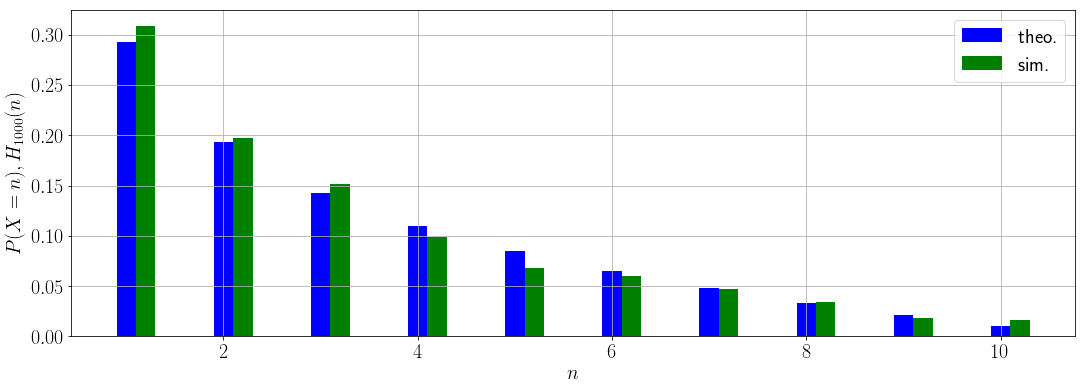

In [4]:
# plotting
plt.figure()    

width = 0.2
plt.bar( values, Pr_theo, linewidth=2.0, width=width, color='b', label='theo.')
plt.bar( values+width, Pr_sim, linewidth=2.0, color='g', width=width, label='sim.')

plt.xlabel('$n$')
plt.ylabel('$P(X=n), H_{{{}}}(n)$'.format( int(N_trials) ) )
plt.grid( True )
plt.legend( loc = 'upper right' )